#### Introduction
The dataset we will use in this project are from kaggle. It can be download from [here.](https://www.kaggle.com/datasets/farhanmd29/50-startups) Let's explore the dataset.

#### Import Libraries

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#### Load the dataset

In [122]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


The dataset have three columns. They are position, level and salary. We would like to predict the salary given their position only. Cause there seem to be direct relationship between position and level. So, we will drop poisition column.

#### Variables

In [123]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

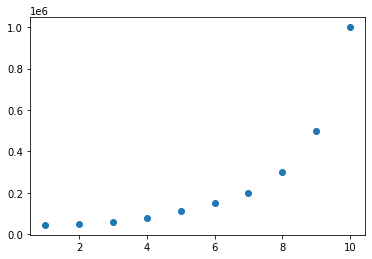

In [124]:
plt.scatter(X,y)

According to the plot above, the salaries are not linear but in curved shape. At this scenarios, it won't be suitable to use linear regression. However, we will test with linear model first. Then, the polynomial regression.

### Preprocess the data 
We need to clean our data before we feed them into polynomial regression model. First, we need to split the data into training set and test set.

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#### Fit our model with linear regression

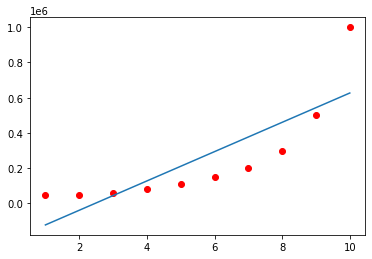

In [126]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X))
plt.show()

From the above visualization, the current scenario is not favourable for linear regression

### Fit the model with polynomial regression

In [130]:
#We need to preprocess the data before we feed the data.
poly = PolynomialFeatures(degree=4)
data_poly = poly.fit_transform(X)
poly_regress = LinearRegression()
poly_regress.fit(data_poly,y)

LinearRegression()

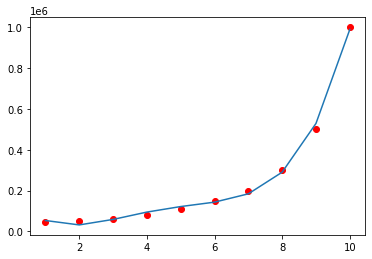

In [131]:
plt.scatter(X,y,color='red')
plt.plot(X,poly_regress.predict(data_poly))
plt.show()

Now, the polynomial regression is better than linear regression for this case.

#### Predict and compare both models

In [134]:
model.predict([[4.5]])

array([169075.34246575])

In [135]:
poly_regress.predict(poly.fit_transform([[4.5]]))

array([109582.14962124])